# Quantum Information and Computing 2022-2023

Nguyen Xuan Tung, ID: 2005491

Week 3, Exercise 1: Scaling of the matrix-matrix multiplication.

Consider the code developed in the Exercise 3 from Assignment 1 (matrix-matrix multiplication):

(a) Write a python script that changes N between two values $N_{𝑚𝑖𝑛}$ and $N_{𝑚𝑎𝑥}$, and launches the program.

(b) Store the results of the execution time in different files depending on the multiplication method used.

(c) Fit the scaling of the execution time for different methods as a function of the input size. Consider the largest possible difference between $N_{𝑚𝑖𝑛}$ and $N_{𝑚𝑎𝑥}$.

(d) Plot results for different multiplication methods.

    

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.polynomial.polynomial as poly

In [2]:
NMIN  = 10
NMAX  = 1000
NSTEP = 10

In [3]:
# MODE = matmul, loop1, loop2
# N    = any integer greater than 1
def stresstest(Nmin,Nmax,Ndelta):
    methods = ['loop1', 'loop2', 'matmul'] 
    # For each method
    for method in methods:
        # For various matrix dimensions
        for N in range(Nmin,Nmax,Ndelta):
            # Run the program for the given method and dimension
            #print(N)
            !echo $method $N | ./mmult
            #os.popen("echo "+method+" "+str(N)+ " | ./mmult")

In [4]:
# Compile the f90 file
!gfortran -o Mat_mul Mat_mul.f90 
!gfortran -o Mat_mul2 Mat_mul2.f90 
!gfortran -o Mat_mul3 Mat_mul3.f90 

c:/users/admin/gcc/bin/../lib/gcc/x86_64-w64-mingw32/10.3.0/../../../../x86_64-w64-mingw32/bin/ld.exe: cannot open output file Mat_mul2.exe: Permission denied
collect2.exe: error: ld returned 1 exit status


In [5]:
stresstest(NMIN,NMAX,NSTEP)

'.' is not recognized as an internal or external command,
operable program or batch file.
'.' is not recognized as an internal or external command,
operable program or batch file.
'.' is not recognized as an internal or external command,
operable program or batch file.
'.' is not recognized as an internal or external command,
operable program or batch file.
'.' is not recognized as an internal or external command,
operable program or batch file.
'.' is not recognized as an internal or external command,
operable program or batch file.
'.' is not recognized as an internal or external command,
operable program or batch file.
'.' is not recognized as an internal or external command,
operable program or batch file.
'.' is not recognized as an internal or external command,
operable program or batch file.
'.' is not recognized as an internal or external command,
operable program or batch file.
'.' is not recognized as an internal or external command,
operable program or batch file.
'.' is not

'.' is not recognized as an internal or external command,
operable program or batch file.
'.' is not recognized as an internal or external command,
operable program or batch file.
'.' is not recognized as an internal or external command,
operable program or batch file.
'.' is not recognized as an internal or external command,
operable program or batch file.
'.' is not recognized as an internal or external command,
operable program or batch file.
'.' is not recognized as an internal or external command,
operable program or batch file.
'.' is not recognized as an internal or external command,
operable program or batch file.
'.' is not recognized as an internal or external command,
operable program or batch file.
'.' is not recognized as an internal or external command,
operable program or batch file.
'.' is not recognized as an internal or external command,
operable program or batch file.
'.' is not recognized as an internal or external command,
operable program or batch file.
'.' is not

'.' is not recognized as an internal or external command,
operable program or batch file.
'.' is not recognized as an internal or external command,
operable program or batch file.
'.' is not recognized as an internal or external command,
operable program or batch file.
'.' is not recognized as an internal or external command,
operable program or batch file.
'.' is not recognized as an internal or external command,
operable program or batch file.
'.' is not recognized as an internal or external command,
operable program or batch file.
'.' is not recognized as an internal or external command,
operable program or batch file.
'.' is not recognized as an internal or external command,
operable program or batch file.
'.' is not recognized as an internal or external command,
operable program or batch file.
'.' is not recognized as an internal or external command,
operable program or batch file.
'.' is not recognized as an internal or external command,
operable program or batch file.
'.' is not

'.' is not recognized as an internal or external command,
operable program or batch file.
'.' is not recognized as an internal or external command,
operable program or batch file.
'.' is not recognized as an internal or external command,
operable program or batch file.
'.' is not recognized as an internal or external command,
operable program or batch file.
'.' is not recognized as an internal or external command,
operable program or batch file.
'.' is not recognized as an internal or external command,
operable program or batch file.
'.' is not recognized as an internal or external command,
operable program or batch file.
'.' is not recognized as an internal or external command,
operable program or batch file.
'.' is not recognized as an internal or external command,
operable program or batch file.
'.' is not recognized as an internal or external command,
operable program or batch file.
'.' is not recognized as an internal or external command,
operable program or batch file.
'.' is not

In [6]:
!head -9 loop.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
!head -9 loop2.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
!head -9 matrix_mul.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


In [14]:
# Load the data points from files
loop     = np.genfromtxt('loop.csv', delimiter=',')
loop2     = np.genfromtxt('loop2.csv', delimiter=',')
internal = np.genfromtxt('matrix_mul.csv', delimiter=',')


In [15]:
# Generic dense x vector for plotting lines
x = np.arange(loop[0,1],loop[-1,1],1)

LOOP MATRIX MULTIPLICATION 

(0.0, 9.0)

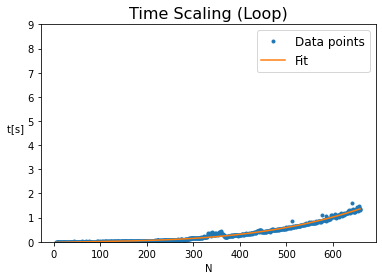

In [16]:
plt.figure()
# Plot the scatter of timings
plt.plot(loop[:,1],loop[:,0], 'o', ms=3, label='Data points')

# Fit a polynomial
coefs = poly.polyfit(loop[:,1],loop[:,0], 3)
fit_loop = poly.polyval(x, coefs)


plt.plot(x,fit_loop,label='Fit')
plt.title("Time Scaling (Loop)",fontsize=16)
plt.legend(prop={'size': 12})
plt.ylabel('t[s]     ').set_rotation(0)
plt.xlabel('N')
plt.ylim(0,9)

  LOOP2 MATRIX MULTIPLICATION  

(0.0, 9.0)

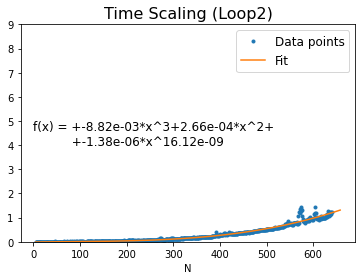

In [17]:
plt.figure()
# Plot the scatter of timings
plt.plot(loop2[:,1],loop2[:,0], 'o', ms=3, label='Data points')

# Fit a polynomial
coefs2 = poly.polyfit(loop2[:,1],loop2[:,0], 3)
fit_loop2 = poly.polyval(x, coefs2)

# This is for printing the equation
eqstr = "f(x) = "
for i in range(len(coefs)):
    if i == (len(coefs) - 1):
        eqstr += str("{:.2e}".format(coefs2[i]))
    else:
        eqstr += "+"+str("{:.2e}".format(coefs2[i]))+"*x^"+str(len(coefs2)-1-i)
    if i == 1:
        eqstr +="+\n          "
plt.text(0, 4, eqstr, fontdict = {'fontsize' : 12})

plt.plot(x,fit_loop2,label='Fit')
plt.title("Time Scaling (Loop2)",fontsize=16)
plt.legend(prop={'size': 12})
plt.xlabel('N')
plt.ylim(0,9)

INTERNAL MATRIX MULTIPLICATION

Text(0.5, 0, 'N')

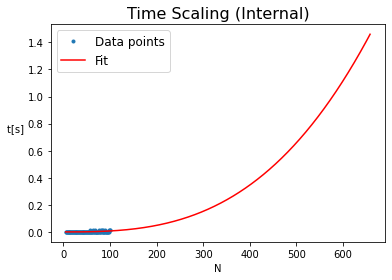

In [18]:
plt.figure()
# Plot the scatter of timings
plt.plot(internal[:,1],internal[:,0], 'o', ms=3, label='Data points')

# Fit a polynomial
coefs = poly.polyfit(internal[:,1],internal[:,0], 3)
fit_int = poly.polyval(x, coefs)

plt.plot(x,fit_int, label='Fit',color='red')
plt.title("Time Scaling (Internal)",fontsize=16)
plt.legend(prop={'size': 12})
plt.ylabel('t[s]     ').set_rotation(0)
plt.xlabel('N')